<a href="https://colab.research.google.com/github/sahilkhan-7/Speech-emotion-recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'><b>Speech Emotion Recognition Neural Networks</b></font>

---

## **DOWNLOADING ALL DATASETS**

In [1]:
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en

!unzip speech-emotion-recognition-en.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

## **Importing Required Libraries**

In [3]:
# Importing System Libraries
import os, sys

# Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Importing Audio Processing Libraries
import librosa
import librosa.display
import soundfile
from IPython.display import Audio, display

# Importing Deep Learning Libraries
import tensorflow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

# Ignore Warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## **Loading the Dataset**

In [4]:
# Dataset Paths
crema = "/content/Crema/" # Contains voices of male and female
savee = "/content/Savee/" # Contain only male voice data
tess = "/content/Tess/" # Have both
ravdess = "/content/Ravdess/audio_speech_actors_01-24/"

### **Loading SAVEE Data**

The audio files in SAVEE are named in such a way that the prefix letters describes the emotion classes as follows:

1. 'a' = 'anger'
2. 'd' = 'disgust'
3. 'f' = 'fear'
4. 'h' = 'happiness'
5. 'n' = 'neutral'
6. 'sa' = 'sadness'
7. 'su' = 'surprise'

In [5]:
# Loading the SAVEE data

savee_directory_list = os.listdir(savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    if file[-8:-6] == '_a':
        file_emotion.append('angry')

    elif file[-8:-6] == '_d':
        file_emotion.append('disgust')

    elif file[-8:-6] == '_f':
        file_emotion.append('fear')

    elif file[-8:-6] == '_h':
        file_emotion.append('happy')

    elif file[-8:-6] == '_n':
        file_emotion.append('neutral')

    elif file[-8:-6] == 'sa':
        file_emotion.append('sad')

    elif file[-8:-6] == 'su':
        file_emotion.append('surprise')

    else:
        file_emotion.append('unknown')

    file_path.append(savee + file)

savee_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
savee_df['Path'] = file_path
savee_df.head()

,Emotions,Path
0,surprise,/content/Savee/KL_su08.wav
1,happy,/content/Savee/DC_h05.wav
2,neutral,/content/Savee/DC_n12.wav
3,disgust,/content/Savee/KL_d09.wav
4,neutral,/content/Savee/KL_n08.wav


In [6]:
savee_df['Emotions'].value_counts()

,count
Emotions,
neutral,120
surprise,60
happy,60
disgust,60
angry,60
sad,60
fear,60


## **Loading The CREMAD Data**

In [7]:
crema_directory_list = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # Storing file paths
    file_path.append(crema + file)
    # Storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('unknown')

# Dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()

,Emotions,Path
0,angry,/content/Crema/1014_IEO_ANG_LO.wav
1,angry,/content/Crema/1044_IEO_ANG_MD.wav
2,happy,/content/Crema/1011_TSI_HAP_XX.wav
3,fear,/content/Crema/1059_IOM_FEA_XX.wav
4,angry,/content/Crema/1051_ITS_ANG_XX.wav


## **Loading the RAVDESS Data**

Here is the filename identifiers as per the official RAVDESS website:

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
Vocal channel (01 = speech, 02 = song).
2. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
3. Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
4. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
5. Repetition (01 = 1st repetition, 02 = 2nd repetition).
6. Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [8]:
# Loading the RAVDESS data
ravdess_directory_list = os.listdir(ravdess)
file_emotion = []
file_path = []

for dir in ravdess_directory_list:
    # There are 24 different actors in RAVDESS directory, so we have to extract the files for each actor

    actor = os.listdir(ravdess + dir)

    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')

        file_emotion.append(int(part[2]))
        # Storing file paths
        file_path.append(ravdess + dir + '/' + file)

ravdess_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
ravdess_df['Path'] = file_path
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace = True)
ravdess_df.head()

,Emotions,Path
0,angry,/content/Ravdess/audio_speech_actors_01-24/Act...
1,disgust,/content/Ravdess/audio_speech_actors_01-24/Act...
2,sad,/content/Ravdess/audio_speech_actors_01-24/Act...
3,happy,/content/Ravdess/audio_speech_actors_01-24/Act...
4,sad,/content/Ravdess/audio_speech_actors_01-24/Act...


In [9]:
ravdess_df.Emotions.value_counts()

,count
Emotions,
neutral,288
angry,192
disgust,192
sad,192
happy,192
fear,192
surprise,192


## **Loading the TESS dataset**

It structure is clear, you can see it

In [10]:
tess_dir_list = os.listdir(tess)
file_emotion = []
file_path = []

for dir in tess_dir_list:
    directories = os.listdir(tess + dir)
    for file in directories:
        file_path.append(tess + dir + '/' + file)

        part = file.split('.')[0]
        part = part.split('_')[2]

        if part == 'ps':
            file_emotion.append('surprise')
        elif part == 'happy':
            file_emotion.append('happy')
        elif part == 'sad':
            file_emotion.append('sad')
        elif part == 'fear':
            file_emotion.append('fear')
        elif part == 'angry':
            file_emotion.append('angry')
        elif part == 'disgust':
            file_emotion.append('disgust')
        elif part == 'neutral':
            file_emotion.append('neutral')
        else:
            file_emotion.append('unknown')

tess_df = pd.DataFrame(file_emotion, columns = ['Emotions'])
tess_df['Path'] = file_path
tess_df.head()

,Emotions,Path
0,angry,/content/Tess/OAF_angry/OAF_peg_angry.wav
1,angry,/content/Tess/OAF_angry/OAF_hall_angry.wav
2,angry,/content/Tess/OAF_angry/OAF_thumb_angry.wav
3,angry,/content/Tess/OAF_angry/OAF_road_angry.wav
4,angry,/content/Tess/OAF_angry/OAF_lose_angry.wav


In [11]:
tess_df.Emotions.value_counts()

,count
Emotions,
angry,400
surprise,400
happy,400
disgust,400
sad,400
fear,400
neutral,400


---

# **Visualization:**

In [12]:
sns.set_style(style='whitegrid')

<ipython-input-13-4a2c97307699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Emotions', data = crema_df, palette = 'Set1', legend = False)


Text(0.5, 1.0, 'Count of Emotions in CREMA-D')

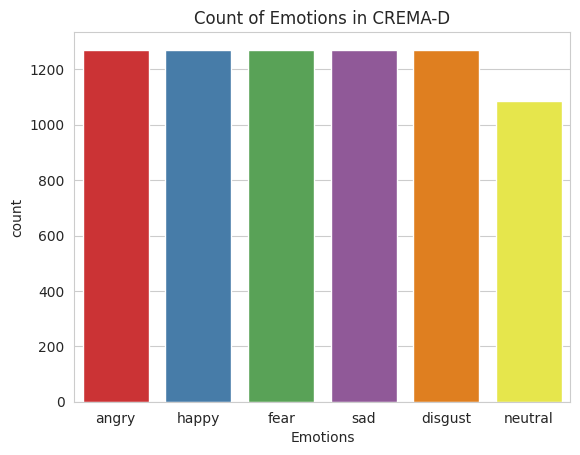

In [13]:
sns.countplot(x = 'Emotions', data = crema_df, palette = 'Set1', legend = False)
plt.title('Count of Emotions in CREMA-D')

In [14]:
df = pd.concat([crema_df, ravdess_df, savee_df, tess_df], axis = 0)
df.reset_index(drop = True, inplace = True)
df.head()

,Emotions,Path
0,angry,/content/Crema/1014_IEO_ANG_LO.wav
1,angry,/content/Crema/1044_IEO_ANG_MD.wav
2,happy,/content/Crema/1011_TSI_HAP_XX.wav
3,fear,/content/Crema/1059_IOM_FEA_XX.wav
4,angry,/content/Crema/1051_ITS_ANG_XX.wav


In [15]:
df['Emotions'].value_counts()

,count
Emotions,
angry,1923
happy,1923
fear,1923
sad,1923
disgust,1923
neutral,1895
surprise,652


<ipython-input-16-a9da56520cad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Emotions', data = df, palette = 'Set1', legend = False)


Text(0.5, 1.0, 'Count of Emotions in All Datasets')

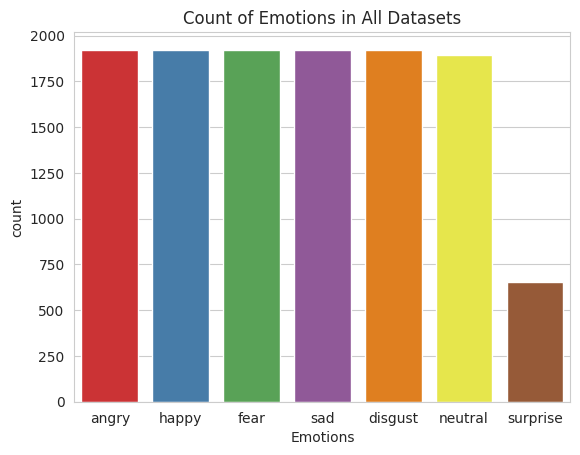

In [16]:
sns.countplot(x = 'Emotions', data = df, palette = 'Set1', legend = False)
plt.title('Count of Emotions in All Datasets')

In [17]:
# Function to plot waveform
def plot_waveform(file_path, emotion, duration=2.5, offset=0.6):
    """
    Plot the waveform of an audio file.

    Parameters:
    - file_path (str): Path to the audio file.
    - emotion (str): Emotion label for the audio file.
    - duration (float): Duration to load from the audio file (in seconds).
    - offset (float): Offset from the start of the file to begin loading (in seconds).
    """
    # Load the audio file
    y, sr = librosa.load(file_path, duration=duration, offset=offset)

    # Plot waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(y, sr=sr, alpha=0.7)
    plt.title(f'Waveform - Emotion: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Function to plot spectrogram
def plot_spectrogram(file_path, emotion, duration=2.5, offset=0.6):
    """
    Plot the spectrogram of an audio file.

    Parameters:
    - file_path (str): Path to the audio file.
    - emotion (str): Emotion label for the audio file.
    - duration (float): Duration to load from the audio file (in seconds).
    - offset (float): Offset from the start of the file to begin loading (in seconds).
    """

    # Load the audio file
    y, sr = librosa.load(file_path, duration=duration, offset=offset)

    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

    # Plot spectrogram
    plt.figure(figsize=(10, 3))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.title(f'Spectrogram - Emotion: {emotion}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [18]:
crema_df.Emotions.value_counts()

,count
Emotions,
angry,1271
happy,1271
fear,1271
sad,1271
disgust,1271
neutral,1087


<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)
<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)
<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)
<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)
<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)
<ipython-input-19-e5963922d3f0>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  row = crema_df[df['Emotions'] == emotion].sample(1)


Visualizing /content/Crema/1069_ITH_ANG_XX.wav - Emotion: angry


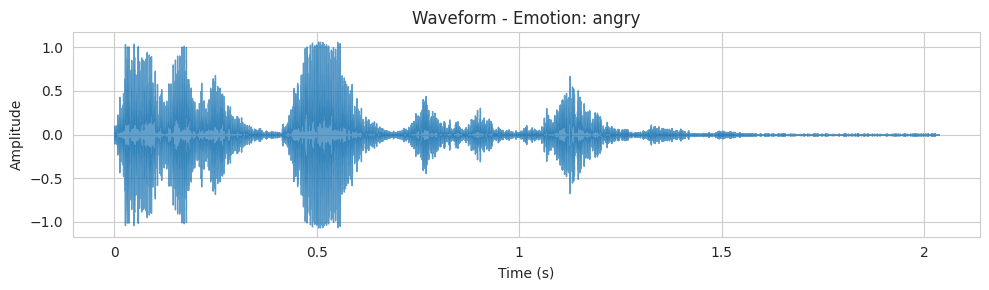

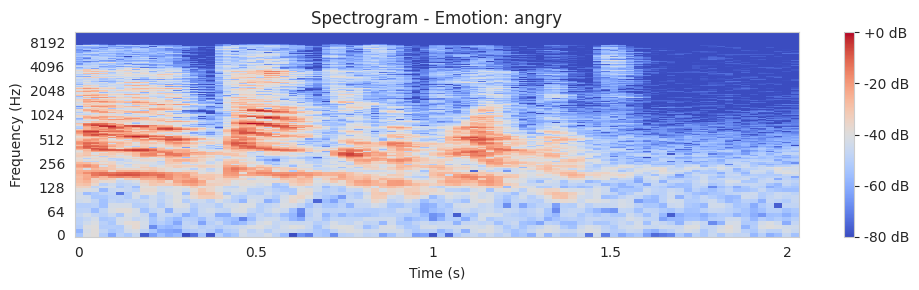

Visualizing /content/Crema/1040_IEO_DIS_MD.wav - Emotion: disgust


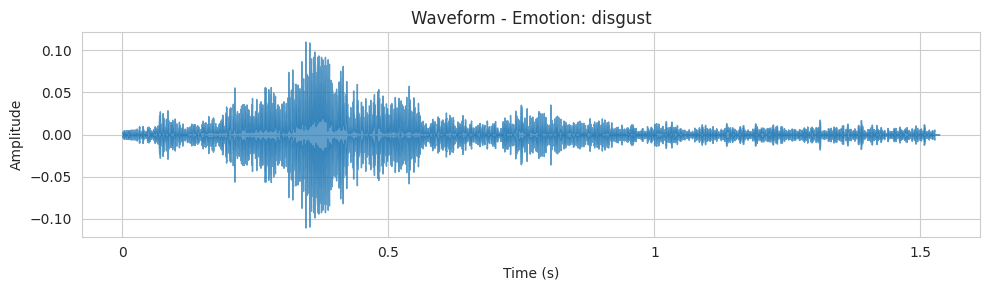

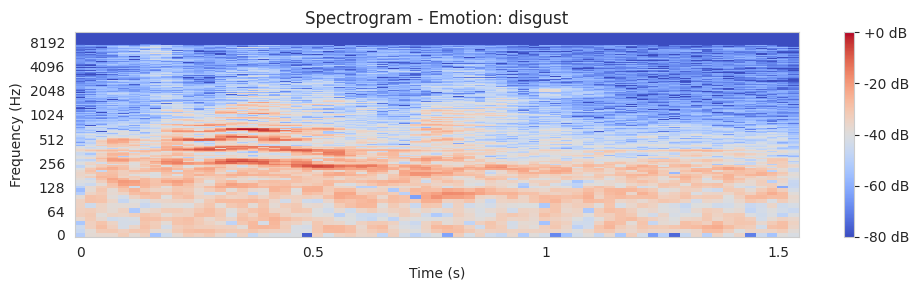

Visualizing /content/Crema/1010_ITH_FEA_XX.wav - Emotion: fear


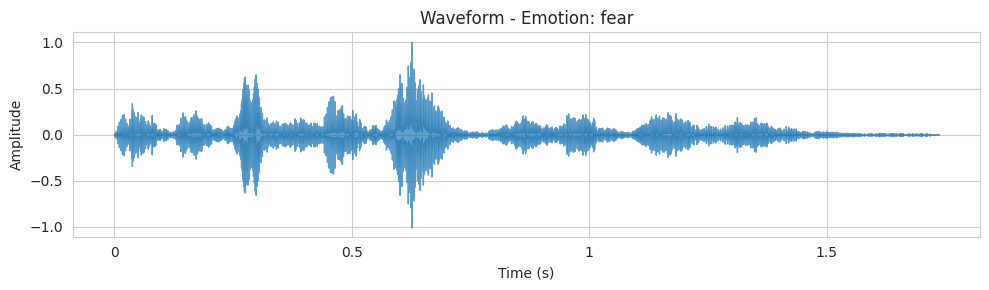

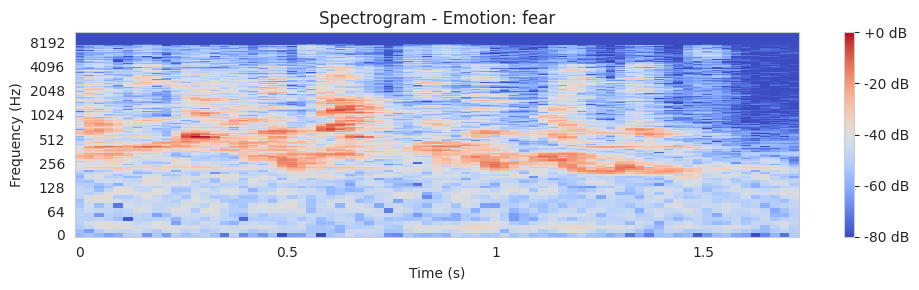

Visualizing /content/Crema/1023_TIE_HAP_XX.wav - Emotion: happy


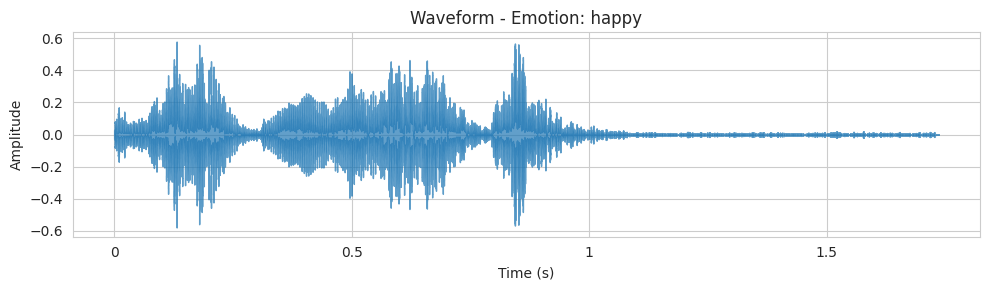

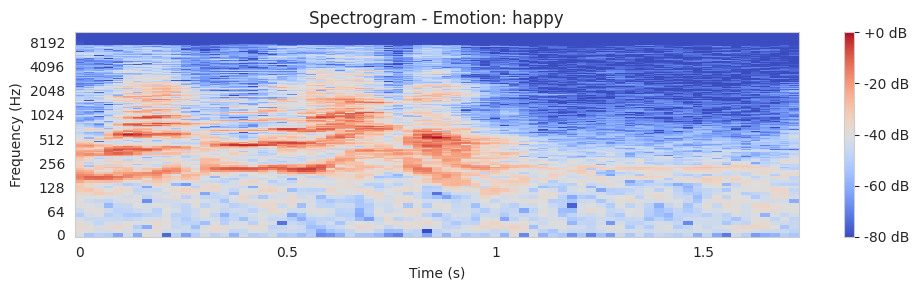

Visualizing /content/Crema/1029_IEO_NEU_XX.wav - Emotion: neutral


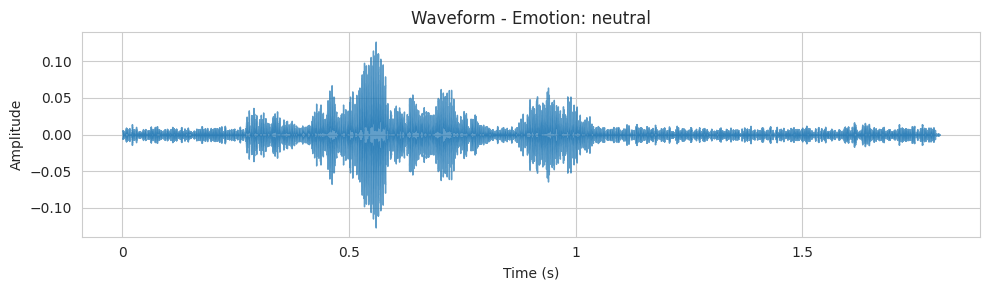

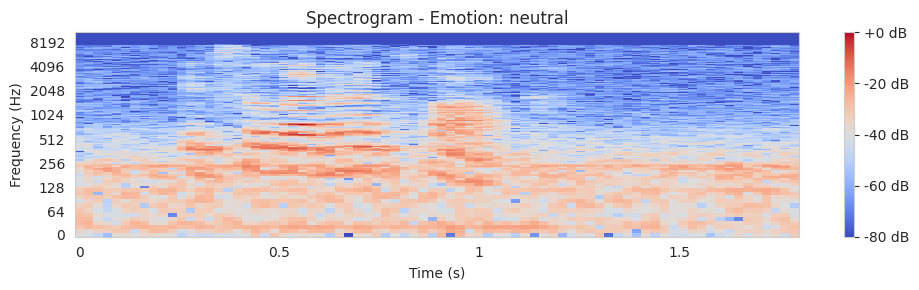

Visualizing /content/Crema/1034_ITS_SAD_XX.wav - Emotion: sad


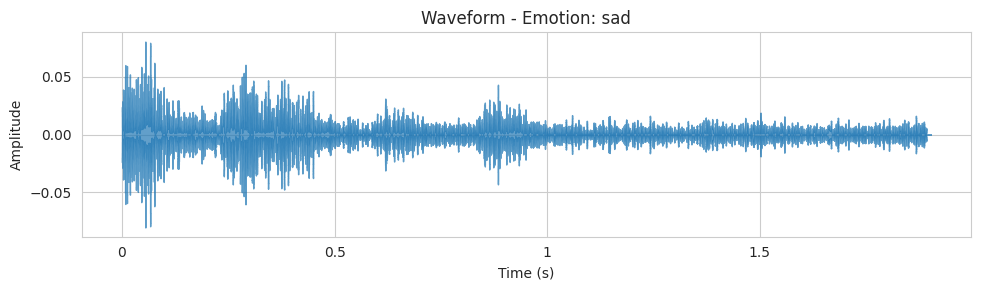

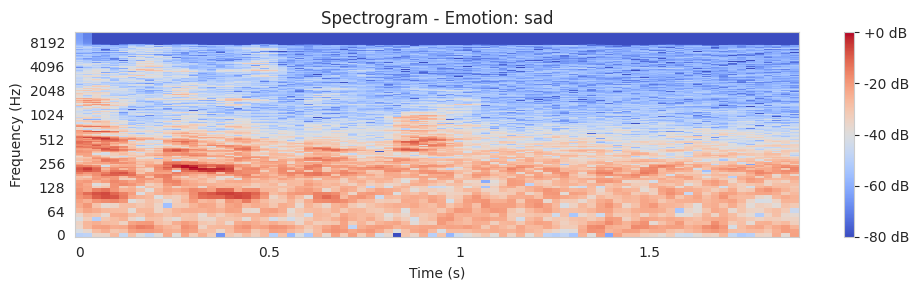

In [19]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

# Creating a dataframe which will hold distinct emotion from data
each_emotion_df = pd.DataFrame(columns = ['Emotions', 'Path'])

# Appending each emotion in the each_emotion_df
for emotion in emotions:
    row = crema_df[df['Emotions'] == emotion].sample(1)
    each_emotion_df = pd.concat([each_emotion_df, row], axis = 0)

# Plotting Waveplot and Spectogram for each emotion
for index, row in each_emotion_df.iterrows():
    file_path = row['Path']
    emotion = row['Emotions']
    print(f"Visualizing {file_path} - Emotion: {emotion}")
    plot_waveform(file_path, emotion)
    plot_spectrogram(file_path, emotion)
    display(Audio(file_path))

In [20]:
df1 = pd.concat([tess_df, ravdess_df, savee_df], axis = 0, ignore_index = True)
df1.head()

,Emotions,Path
0,angry,/content/Tess/OAF_angry/OAF_peg_angry.wav
1,angry,/content/Tess/OAF_angry/OAF_hall_angry.wav
2,angry,/content/Tess/OAF_angry/OAF_thumb_angry.wav
3,angry,/content/Tess/OAF_angry/OAF_road_angry.wav
4,angry,/content/Tess/OAF_angry/OAF_lose_angry.wav


In [21]:
df1.Emotions.value_counts()

,count
Emotions,
neutral,808
angry,652
surprise,652
happy,652
disgust,652
sad,652
fear,652


In [22]:
808 - 652

156

In [23]:
df_intermediate1 = df1[df1['Emotions'] != 'neutral']
df_intermediate2 = df1[df1['Emotions'] == 'neutral']

In [24]:
(652/808)* 100

80.6930693069307

In [25]:
df_neutral = df_intermediate2.sample(frac = 0.8069)

In [26]:
df2 = pd.concat([df_intermediate1, df_neutral], axis = 0, ignore_index = True)
df2.head()

,Emotions,Path
0,angry,/content/Tess/OAF_angry/OAF_peg_angry.wav
1,angry,/content/Tess/OAF_angry/OAF_hall_angry.wav
2,angry,/content/Tess/OAF_angry/OAF_thumb_angry.wav
3,angry,/content/Tess/OAF_angry/OAF_road_angry.wav
4,angry,/content/Tess/OAF_angry/OAF_lose_angry.wav


In [27]:
df2.Emotions.value_counts()

,count
Emotions,
angry,652
surprise,652
happy,652
disgust,652
sad,652
fear,652
neutral,652


# **Feature Extraction:**

In [ ]:
# crema_df

In [ ]:
# def extract_features(file_path):
#     y, sr = librosa.load(file_path)
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#     return mfccs.mean(axis=1)

# crema_df['features'] = crema_df['Path'].apply(extract_features) # Extracting features from audio files


In [ ]:
# crema_df

In [ ]:
# crema_df.features[0].shape

In [42]:
# Function to extract features from audio files
def extract_features(file_name):
    """
    Extracts audio features from a file.

    Parameters:
    - file_name (str): Path to the audio file.

    Returns:
    - features (np.ndarray): Extracted feature vector.
    """
    y, sr = librosa.load(file_name, duration=2.5, offset=0.6)

    # Extract various features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    rmse = librosa.feature.rms(y=y)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Aggregate features
    features = np.hstack([
        np.mean(mfccs, axis=1),
        np.mean(chroma, axis=1),
        np.mean(mel, axis=1),
        np.mean(contrast, axis=1),
        np.mean(zcr, axis=1),
        np.mean(rmse, axis=1),
        np.mean(spectral_bandwidth, axis=1),
        np.mean(spectral_rolloff, axis=1)
    ])

    return features

def extract_features_df(df):
    """
    Extracts features from a DataFrame of audio files.

    Parameters:
    - df (pd.DataFrame): DataFrame containing audio file paths.

    Returns:
    - features_df (pd.DataFrame): DataFrame with extracted features.
    """

    # Initialize lists to store features and labels
    emotion_labels = []
    features_list = []

    # Iterate through the DataFrame and extract features
    for index, row in tess_df.iterrows():
        file_path = row['Path']
        emotion = row['Emotions']

        # Extract features and append to lists
        features = extract_features(file_path)
        features_list.append(features)
        emotion_labels.append(emotion)

    # Convert lists to a DataFrame
    features_df = pd.DataFrame(features_list)
    features_df['emotion'] = emotion_labels

    return features_df

features_df = extract_features_df(tess_df)
print("Feature extraction complete.")
print("Features shape:", features_df.shape)

Feature extraction complete.
Features shape: (2800, 192)


In [43]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,emotion
0,-421.359253,84.608025,-4.618169,-0.644245,3.533967,8.009356,-27.559296,-10.334091,-12.705626,-3.248723,...,24.994716,20.103424,21.656238,18.663073,46.191586,0.048942,0.031614,1920.275220,2439.261219,0
1,-387.302185,91.362679,3.061267,-25.556063,-43.367687,0.608693,-13.053836,-0.651653,-15.478967,-2.305815,...,27.633074,26.991289,23.839347,21.032983,47.039795,0.055927,0.036014,2012.874016,2684.472656,0
2,-418.355682,70.638992,9.331368,-17.041399,-10.737277,18.382019,-9.007825,-6.194646,-19.963173,-9.318632,...,23.997297,21.643308,19.872570,19.366037,46.206757,0.133278,0.031752,2176.154296,3931.812659,0
3,-423.893555,110.070541,12.629550,-33.157551,-27.215849,2.414340,-7.382116,-13.900273,-15.124195,-15.865015,...,30.378078,25.324022,24.390742,19.892630,47.304663,0.044480,0.041441,1727.885052,1355.822754,0
4,-434.572754,73.126999,7.764900,-2.444673,-13.875369,14.572214,-0.821045,-20.283676,-29.641415,-9.264151,...,27.540229,24.272782,22.352874,20.594867,47.356150,0.067113,0.028604,2155.823712,3240.288917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-302.877533,14.897584,21.803652,11.946935,-14.752172,7.062735,0.361066,-13.000259,-4.855634,0.274504,...,19.063203,17.949327,18.738523,21.283037,47.797837,0.281543,0.071784,2209.583634,6163.585760,0
2796,-337.739746,67.331604,-2.129947,12.358255,-16.624918,7.367688,-4.529144,-29.402643,-5.242671,-4.350592,...,25.005209,20.140312,21.099810,21.855897,47.603699,0.076790,0.053518,2351.085656,4684.649277,0
2797,-296.418030,82.633308,-18.661676,10.957814,-10.802510,5.708628,6.667040,-13.604873,-0.388094,6.960113,...,20.950049,17.532060,18.877583,21.835385,47.393591,0.070038,0.095954,2146.143165,4247.329873,0
2798,-349.203033,69.761353,-18.984808,28.344484,-16.668674,-12.003938,5.230905,-33.148777,-10.154876,-12.852427,...,28.327436,21.779398,24.475558,26.311947,46.911087,0.083391,0.044142,2051.837940,3877.822266,0


In [30]:
# features_df.describe()

In [31]:
# Encoding the target column
lb = LabelEncoder()
features_df['emotion'] = lb.fit_transform(features_df['emotion'])

# Display the mapping of labels to integers
label_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [32]:
# Splitting the dataset
X = features_df.drop('emotion', axis=1)
y = features_df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [33]:
X_train.shape, X_test.shape

((2240, 191), (560, 191))

In [34]:
# Scaling the inputs
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [35]:
# X_train

In [36]:
# One-Hot Encoding the target column
y_train_encoded = to_categorical(y_train, num_classes = y_train.nunique())
y_test_encoded = to_categorical(y_test, num_classes = y_train.nunique())

# **Model Building**

## **Building a simple ANN model**

In [37]:
X_train.shape

(2240, 191)

In [ ]:
# Instantiating the Sequential API
model1 = Sequential()

# Input Layer
model1.add(Input(shape = (X_train.shape[1],)))

# First Hidden layer with 512 neuron
model1.add(Dense(512, activation = 'relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())

# Second Hidden layer with 256 neuron
model1.add(Dense(256, activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(BatchNormalization())

# Third Hidden Layer with 128 neurons
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())

# Third Hidden Layer with 64 neurons
model1.add(Dense(64, activation = 'relu'))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())

# Output Layer
model1.add(Dense(6, activation = 'softmax'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train_encoded, validation_data = (X_test, y_test_encoded), epochs = 50, batch_size = 16)

In [ ]:
pd.DataFrame(history1.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

In [ ]:
# MODEL #2

from tensorflow.keras.layers import LeakyReLU

# Instantiating the Sequential API
model2 = Sequential()

# Input Layer
model2.add(Input(shape = (X_train.shape[1],)))

# First Hidden layer with 512 neuron
model2.add(Dense(512, kernel_initializer = 'he_normal', activation = LeakyReLU(alpha = 0.01)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Second Hidden layer with 256 neuron
model2.add(Dense(256, kernel_initializer = 'he_normal', activation = LeakyReLU(alpha = 0.01)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Third Hidden Layer with 128 neurons
model2.add(Dense(128, kernel_initializer = 'he_normal', activation = LeakyReLU(alpha = 0.01)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Third Hidden Layer with 64 neurons
model2.add(Dense(64, kernel_initializer = 'he_normal', activation = LeakyReLU(alpha = 0.01)))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())

# Output Layer
model2.add(Dense(6, activation = 'softmax'))

In [ ]:
model2.summary()

In [ ]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train_encoded, validation_data = (X_test, y_test_encoded), epochs = 30, batch_size = 8)

In [ ]:
pd.DataFrame(history2.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

## **Building Complex model with functional API**

In [ ]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model

In [ ]:
# input layer

input = Input(shape=(X_train.shape[1],))

# First branch
hidden1 = Dense(512, kernel_initializer = 'he_normal', activation=LeakyReLU(0.01))(input)
hidden1 = Dropout(0.3)(hidden1)
hidden1 = BatchNormalization()(hidden1)

# Second Brach
hidden2 = Dense(256, kernel_initializer = 'he_normal', activation=LeakyReLU(0.02))(hidden1)
hidden2 = Dropout(0.3)(hidden2)
hidden2 = BatchNormalization()(hidden2)

# Merged Branch
merged = Concatenate()([hidden1, hidden2])

# Third Branch
hidden3 = Dense(128, kernel_initializer = 'he_normal', activation=LeakyReLU(0.02))(merged)
hidden3 = Dropout(0.3)(hidden3)
hidden3 = BatchNormalization()(hidden3)

# Third Branch
hidden3 = Dense(128, kernel_initializer = 'he_normal', activation=LeakyReLU(0.02))(merged)
hidden3 = Dropout(0.3)(hidden3)
hidden3 = BatchNormalization()(hidden3)

# Output Layer

output = Dense(6, activation='softmax')(hidden3)

# Create the model
model3 = Model(inputs=input, outputs=output)

In [ ]:
model3.summary()

In [ ]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history3 = model3.fit(X_train, y_train_encoded, validation_data = (X_test, y_test_encoded), epochs = 30, batch_size = 8)

The above models are not converging at all. So we have to use CNN algorithms to model this dataset.



## **Building Model Using CNN & LSTM**

In [38]:
# Reshape the input data for CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train_reshaped.shape[1], 1)))

# CNN layers
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# LSTM layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(128))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 189, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 94, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 94, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 92, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 46, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 44, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 22, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 22, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 22, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 471,431 (1.80 MB)

 Trainable params: 470,535 (1.79 MB)

 Non-trainable params: 896 (3.50 KB)

In [39]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train_reshaped, y_train_encoded, epochs=50, batch_size=8, validation_data = (X_test_reshaped, y_test_encoded))

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.3974 - loss: 1.5125 - val_accuracy: 0.1661 - val_loss: 3.1301
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.7785 - loss: 0.6281 - val_accuracy: 0.6196 - val_loss: 1.2045
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - accuracy: 0.8926 - loss: 0.3214 - val_accuracy: 0.9071 - val_loss: 0.2967
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step - accuracy: 0.8866 - loss: 0.3522 - val_accuracy: 0.9375 - val_loss: 0.1884
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - accuracy: 0.9479 - loss: 0.1565 - val_accuracy: 0.8679 - val_loss: 0.3893
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.9682 - loss: 0.1019 - val_accuracy: 0.9196 - val_loss: 0.2255
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - accuracy: 0.9703 - loss: 0.1007 - val_accuracy: 0.9429 - val_loss: 0.1866
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 43s 83ms/step - accuracy: 0.9761 - loss: 0.0806 - 

(0.0, 3.0)

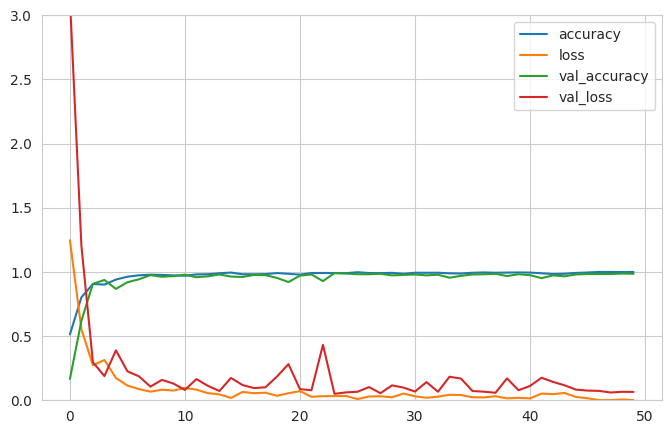

In [41]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)

In [49]:
# Saving the model
model.save('model.keras')

# **Training on More data**

In [46]:
df2.Emotions.value_counts()

,count
Emotions,
angry,652
surprise,652
happy,652
disgust,652
sad,652
fear,652
neutral,652


In [47]:
features_df2 = extract_features_df(df2)
print("Feature extraction complete.")
print("Features shape:", features_df2.shape)

KeyboardInterrupt: 